In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
data.shape

(11914, 16)

In [5]:
pd.DataFrame(data.dtypes.unique()).T

,0,1,2
0,object,int64,float64


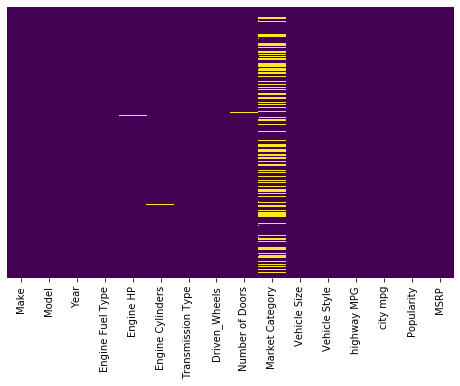

In [6]:
fig, ax = plt.subplots(figsize = (8, 5))
sb.heatmap(data.isna(),
          yticklabels = False,
          cbar = False,
          cmap = 'viridis')
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [8]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [9]:
len(data['Year'].unique())

28

In [10]:
df = data[['Year', 'MSRP']].groupby(['Year'])
df.head(1)

,Year,MSRP
0,2011,46135
5,2012,31200
9,2013,37200
17,1992,2000
22,1993,2000
27,1994,2000
32,2017,27495
35,1991,2000
41,2016,32850
58,1990,2000


In [11]:
df = ([data[['Year','MSRP']].groupby(['Year']).mean().index[i] for i in range(12)])
df

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001]

In [12]:
mn = ([data[['Year', 'MSRP']].groupby(['Year']).mean().iloc[i] for i in range(2)])
mn

[MSRP    2020.203252
 Name: 1990, dtype: float64, MSRP    2080.657895
 Name: 1991, dtype: float64]

In [13]:
mean_price = pd.DataFrame({'index' : [data[['Year','MSRP']].groupby(['Year']).mean().index[i] for i in range(28)],
                          'meanprice' : [data[['Year', 'MSRP']].groupby(['Year']).mean().iloc[i] for i in range(28)]})

std_price = pd.DataFrame({'index' : [data[['Year','MSRP']].groupby(['Year']).std().index[i] for i in range(28)],
                          'stdprice' : [data[['Year','MSRP']].groupby(['Year']).std().iloc[i] for i in range(28)]})

In [14]:
mean_price.head()

,index,meanprice
0,1990,"MSRP 2020.203252 Name: 1990, dtype: float64"
1,1991,"MSRP 2080.657895 Name: 1991, dtype: float64"
2,1992,"MSRP 2077.740113 Name: 1992, dtype: float64"
3,1993,"MSRP 2187.325359 Name: 1993, dtype: float64"
4,1994,"MSRP 2312.030675 Name: 1994, dtype: float64"


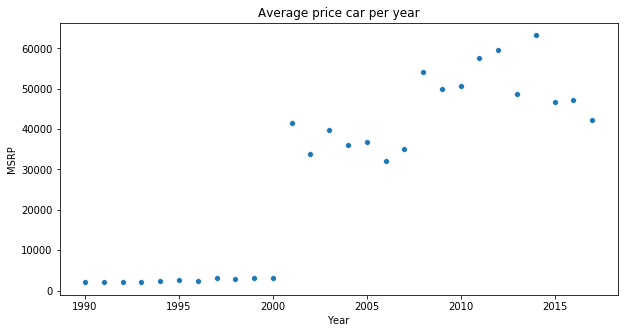

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

sb.scatterplot(x = 'index', y = 'meanprice', data = mean_price)

ax.set_title('Average price car per year')
ax.set_xlabel('Year')
ax.set_ylabel('MSRP')

plt.show()

In [16]:
std_price.head()

,index,stdprice
0,1990,"MSRP 119.120476 Name: 1990, dtype: float64"
1,1991,"MSRP 396.178585 Name: 1991, dtype: float64"
2,1992,"MSRP 401.059322 Name: 1992, dtype: float64"
3,1993,"MSRP 717.992748 Name: 1993, dtype: float64"
4,1994,"MSRP 2124.318779 Name: 1994, dtype: float64"


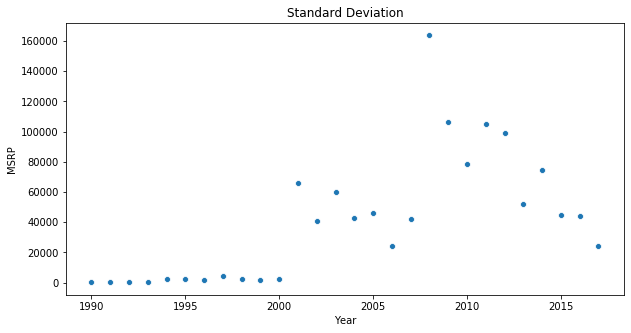

In [17]:
fig, ax = plt.subplots(figsize=(10,5))

sb.scatterplot(x = 'index', y = 'stdprice', data = std_price)

ax.set_title('Standard Deviation')
ax.set_xlabel('Year')
ax.set_ylabel('MSRP')

plt.show()

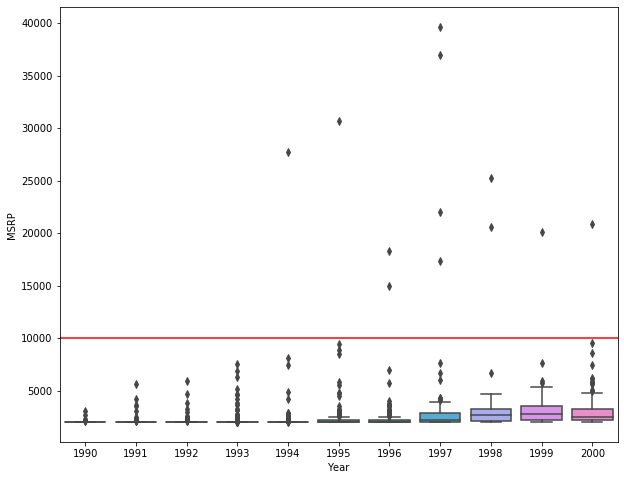

In [18]:
plt.figure(figsize=(10,8))
sb.boxplot(x="Year", y="MSRP", data = data[data['Year'] <= 2000])
plt.axhline(y=10000, color='r')
plt.show()

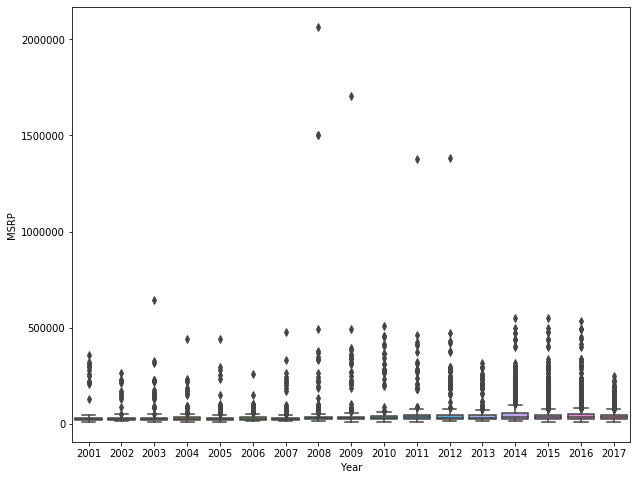

In [19]:
plt.figure(figsize=(10,8))
sb.boxplot(x="Year", y="MSRP", data = data[data['Year'] > 2000])
#plt.axhline(y=10000, color='r')
plt.show()

In [20]:
data.shape

(11914, 16)

removing outliers

In [21]:
data = data.loc[((data['Year'] <= 2000) & (data['MSRP'] < 10000)) | ((data['Year'] > 2000) & (data['MSRP'] < 1000000))]

In [22]:
data.shape

(11896, 16)

After removing the outliers

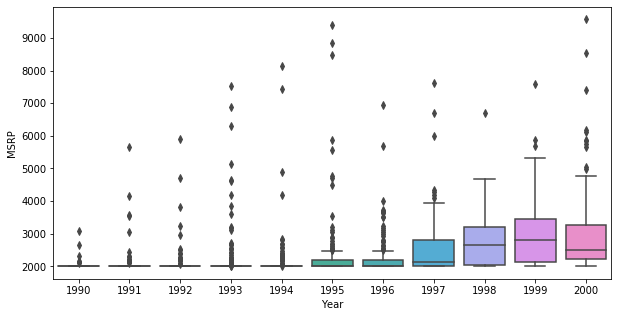

In [23]:
plt.figure(figsize=(10,5))
sb.boxplot(x="Year", y="MSRP", data = data[data['Year'] <= 2000])
plt.show()

car brands

In [24]:
pd.DataFrame(data['Make'].value_counts())

,Make
Chevrolet,1123
Ford,881
Volkswagen,809
Toyota,740
Dodge,626
Nissan,558
GMC,515
Honda,449
Mazda,423
Cadillac,397


In [25]:
print(sum(data['Make'].value_counts()))
print()

# Percentage of car per brand
counts = (data['Make'].value_counts() * 100 / sum(data['Make'].value_counts()))

print(counts)

11896

Chevrolet        9.440148
Ford             7.405851
Volkswagen       6.800605
Toyota           6.220578
Dodge            5.262273
Nissan           4.690652
GMC              4.329186
Honda            3.774378
Mazda            3.555817
Cadillac         3.337256
Mercedes-Benz    2.967384
Suzuki           2.950572
BMW              2.807666
Infiniti         2.774042
Audi             2.757229
Hyundai          2.547075
Volvo            2.362139
Subaru           2.151984
Acura            2.118359
Kia              1.941829
Mitsubishi       1.790518
Lexus            1.698050
Buick            1.647613
Chrysler         1.571957
Pontiac          1.563551
Lincoln          1.378615
Oldsmobile       1.260928
Land Rover       1.168460
Porsche          1.143241
Saab             0.933087
Aston Martin     0.781775
Plymouth         0.672495
Bentley          0.622058
Ferrari          0.580027
FIAT             0.521184
Scion            0.504371
Maserati         0.487559
Lamborghini      0.428716
Rolls

In [26]:
# 9 most present labels
popular_labels = counts.index[:10]
popular_labels

Index(['Chevrolet', 'Ford', 'Volkswagen', 'Toyota', 'Dodge', 'Nissan', 'GMC',
       'Honda', 'Mazda', 'Cadillac'],
      dtype='object')

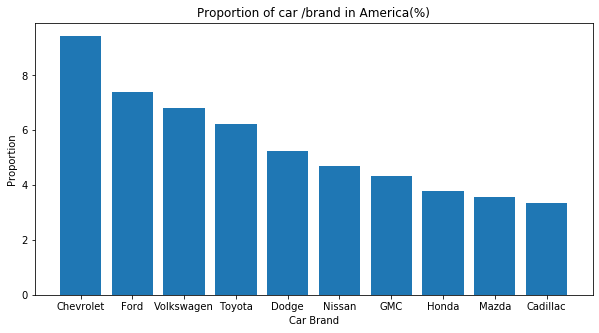

In [27]:
plt.figure(figsize = (10,5))
plt.bar(popular_labels, height = counts[:10])
plt.title('Proportion of car /brand in America(%)')
plt.xlabel('Car Brand')
plt.ylabel('Proportion')
plt.show()

In [28]:
print("Overall there are " ,len(counts),
      "different car brands, the 10 most recurrent car brands in that dataset have",sum(counts[:10]),
      "% of the total number of cars ")


Overall there are  47 different car brands, the 10 most recurrent car brands in that dataset have 54.816745124411575 % of the total number of cars 


#### What is the average price among the 9 most represented brands ?

In [29]:
data[['Make', 'MSRP']].loc[data['Make'] == 'Chevrolet'].mean()

MSRP    28350.385574
dtype: float64

In [30]:
prices = data[['Make','MSRP']].loc[(data['Make'] == 'Chevrolet')|
                                   (data['Make'] == 'Ford')|
                                   (data['Make'] == 'Volkswagen')|
                                   (data['Make'] == 'Toyota')|
                                   (data['Make'] == 'Dodge')|
                                   (data['Make'] == 'Nissan')|
                                   (data['Make'] == 'GMC')|
                                   (data['Make'] == 'Honda')|
                                   (data['Make'] == 'Mazda')].groupby('Make').mean()

pd.DataFrame(prices)

,MSRP
Make,
Chevrolet,28350.385574
Dodge,22390.059105
Ford,27399.266742
GMC,30493.299029
Honda,26674.340757
Mazda,20039.382979
Nissan,28583.431900
Toyota,29105.356757
Volkswagen,28102.380717


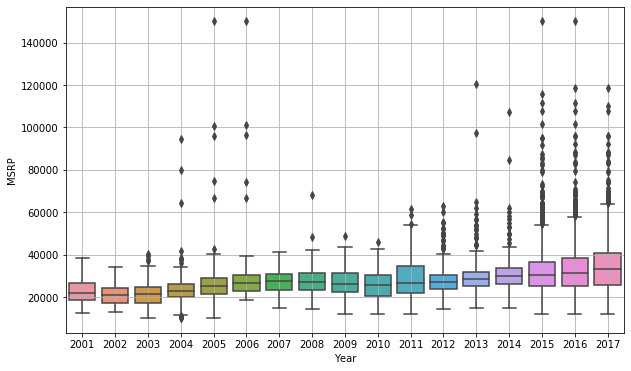

In [31]:
plt.figure(figsize = (10, 6))
sb.boxplot(x = 'Year', 
           y = 'MSRP', 
           data = data[['Make','Year','MSRP']].loc[((data['Make'] == 'Chevrolet')|
                                                   (data['Make'] == 'Ford')|
                                                   (data['Make'] == 'Volkswagen')|
                                                   (data['Make'] == 'Toyota')|
                                                   (data['Make'] == 'Dodge')|
                                                   (data['Make'] == 'Nissan')|
                                                   (data['Make'] == 'GMC')|
                                                   (data['Make'] == 'Honda')|
                                                   (data['Make'] == 'Mazda')) & (data['Year'] > 2000)])
plt.grid()
plt.show()

In [34]:
data.shape

(11896, 16)

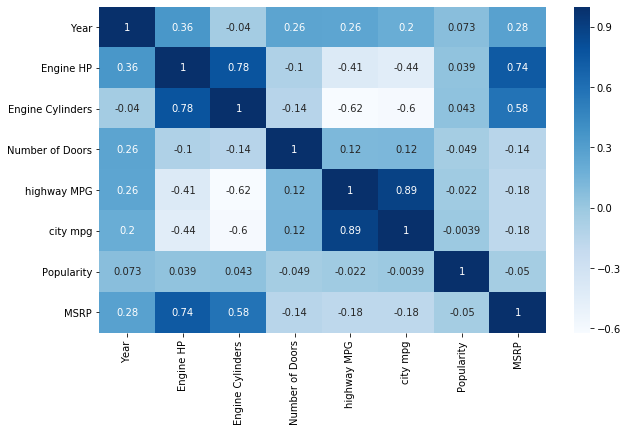

In [35]:
plt.figure(figsize = (10, 6))

corr = data.corr()
ax = sb.heatmap(corr,
          annot = True,
          cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

group categories (unleaded, flex-fuel, diesel, electric, natural gas)

In [36]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [39]:
data.loc[(data["Engine Fuel Type"] == 'premium unleaded (required)') | 
         (data["Engine Fuel Type"] == 'regular unleaded') | 
        (data['Engine Fuel Type'] == 'premium unleaded (recommended)')] = 'unleaded'


data.loc[(data['Engine Fuel Type'] == 'flex-fuel (unleaded/E85)' )| 
         (data['Engine Fuel Type'] == 'flex-fuel (premium unleaded required/E85)') |
         (data['Engine Fuel Type'] == 'flex-fuel (premium unleaded recommended/E85)') | 
         (data['Engine Fuel Type'] == 'flex-fuel (unleaded/natural gas)')] = 'flex-fuel'

In [40]:
data['Engine Fuel Type'].unique()

array(['unleaded', 'flex-fuel', 'diesel', 'electric', 'natural gas', nan],
      dtype=object)

In [67]:
#Engine Fuel Type before 2015
eng =  data.loc[(data['Year']!=2017) & (data['Year']!=2016) & (data['Year']!=2015),'Engine Fuel Type'].value_counts()

#Engine Fuel Type after 2015
eng2 = data.loc[(data['Year']==2017) | (data['Year']==2016) | (data['Year']==2015),'Engine Fuel Type'].value_counts()

In [72]:
print('*********************eng********************')
print(eng)
print()
print('*********************eng2********************')
print(eng2)

*********************eng********************
unleaded     10686
flex-fuel      985
diesel          45
electric        15
Name: Engine Fuel Type, dtype: int64

*********************eng2********************
diesel         109
electric        51
natural gas      2
Name: Engine Fuel Type, dtype: int64


In [95]:
prop_eng_ft = pd.DataFrame({'Engine Fuel Type':['unleaded',
                                               'flex-fuel',
                                                'diesel',
                                                'electric'],
                           'Proportion':[eng[i] * 100 / sum(eng) for i in range(len(eng))]})

In [96]:
prop_eng_ft

,Engine Fuel Type,Proportion
0,unleaded,91.091979
1,flex-fuel,8.396556
2,diesel,0.383599
3,electric,0.127866


# Checking if there are duplicate rows in data

In [104]:
df = data[data.duplicated()]

In [105]:
print('number of duplicate rows:', df.shape)

number of duplicate rows: (11673, 16)


In [106]:
pd.DataFrame(data.count())

,0
Make,11896
Model,11896
Year,11896
Engine Fuel Type,11893
Engine HP,11851
Engine Cylinders,11886
Transmission Type,11896
Driven_Wheels,11896
Number of Doors,11891
Market Category,11886


In [107]:
data = data.drop_duplicates()

In [108]:
pd.DataFrame(data.count())

,0
Make,223
Model,223
Year,223
Engine Fuel Type,220
Engine HP,178
Engine Cylinders,213
Transmission Type,223
Driven_Wheels,223
Number of Doors,218
Market Category,213
